
# K-Nearest Neighbors

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point.

In [1]:
!pip install scikit-learn==0.23.1
!pip install numpy

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [107 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "A

### Import the packages


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Load the dataset

In [27]:
df = pd.read_csv('../../data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Understand the Data

### `teleCust1000t.csv`:
**`teleCust1000t.csv`**, A telecommunications company has segmented its customer base into four groups based on service usage patterns. The company wishes to use demographic data (such as age and income) to predict the group membership of prospective customers.


The **target variable** is `custcat`, which indicates the service segment of the customer. The dataset includes the following features:

- **region**: The region where the customer resides.
- **tenure**: The number of years the customer has been using the service.
- **age**: The age of the customer.
- **marital**: Marital status (e.g., married or not).
- **address**: Address-related information.
- **income**: Annual income of the customer.
- **ed**: Education level.
- **employ**: Employment status.
- **retire**: Retirement status.
- **gender**: Gender of the customer.
- **reside**: Residence status.
- **custcat**: Target variable (customer segment). The possible classes are:
  - 1: Basic Service
  - 2: E-Service
  - 3: Plus Service
  - 4: Total Service


This is a **classification** problem where the objective is to predict the class (customer segment) of a new customer based on known data. Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


### Visualization


In [28]:
# Total records in each class
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


array([[<Axes: title={'center': 'income'}>]], dtype=object)

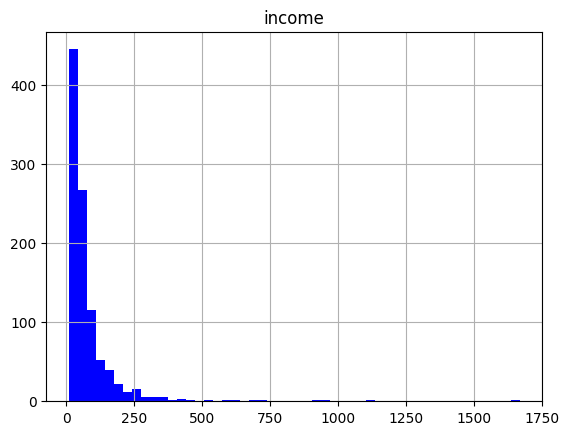

In [29]:
df.hist(column='income', bins=50, color='blue')

### Feature set


Let's define feature sets, X:


In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [30]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

What are our labels?


In [31]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Data Normalization


Data standardization adjusts the data so that it has a mean of zero and a standard deviation of one. This is important for algorithms like KNN, which rely on measuring the distance between data points. Standardization ensures that all features contribute equally to the calculation, regardless of their original scale.

In [32]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train and Test Dataset Split

When building a machine learning model, it is important to evaluate how well it performs on new, unseen data. Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. To do this, we split our dataset into two parts:

**Training Set**: Used to train the model.

**Testing Set**: Used to test how well the model performs on data it has not seen before.

By doing this split, we get a better understanding of how well the model generalizes to new data, as the testing set acts like "new" data that the model has never encountered during training (**out-of-sample accuracy**). This helps us measure the model’s accuracy and reliability.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# K nearest neighbor (KNN) Classification


### Training

Let's start the algorithm with k=4 for now:


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# number of neighbors
k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [35]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

### Evaluation

In multilabel classification, accuracy measures how well the predicted labels match the actual labels for each sample. Here's how it works in simple terms:

Each sample in the dataset can belong to multiple classes (labels) at the same time.
The accuracy score checks if all the predicted labels for a sample are exactly the same as the actual labels.

In [36]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


**Train Accuracy**: It measures how well the model performs on the training data (the data it has learned from). High train accuracy indicates that the model has learned the patterns in the training data effectively.

**Test Accuracy**: It measures how well the model performs on unseen data (the test set). High test accuracy indicates that the model can generalize well to new data, while low test accuracy may suggest overfitting or underfitting.

### Plot the model accuracy for a different number of neighbors.


In [37]:
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315])

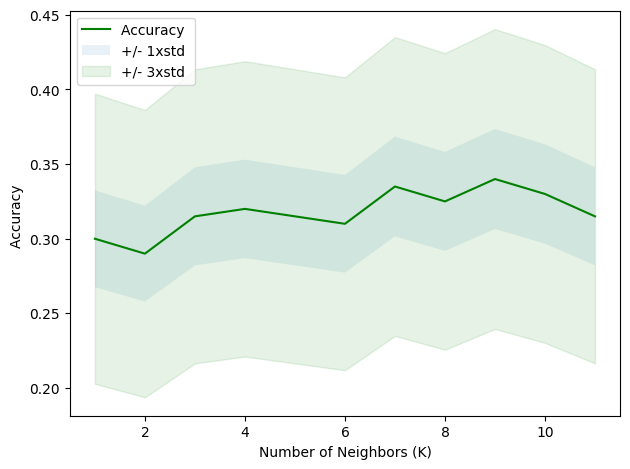

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
